#Aprendizado da Detecção de Codificação
O objetivo deste trabalho é ter uma experiência básica com o Scikit-Learn.

Para isso você deve fazer uma modificação do programa de aprendizado de máquina usado em sala de aula para atingir os seguintes objetivos:

1) Usar a codificação adicional "latin_1", que é a mesma que a ISO-8859-1, ainda para o português. Isso vai causar uma confusão com a "cp1252", ou "Windows-1252". A diferença entre os dois é pequena. Mostre o gráfico da árvore, a acurácia e a matriz de confusão. (fácil)

2) Usar um algoritmo de agrupamento (um simples, como K-means), com os 4 grupos que são bem separados, na coleção original, e veja se os grupos correspondem as classes originais. (médio)

3) Busque um texto em espanhol (razoavelmente grande) e veja o impacto que tem na detecção da codificação em 4 grupos (programa original do professor). O Projeto Gutenberg pode ajudar com o texto, ou o nltk. Execute a árvore de decisão com textos em espanhol  e mostre o gráfico da árvore, matriz de confusão e acurácia mais uma vez. Mantenha todos os textos com o mesmo tamanho aproximado (2 a 3K). 

4) Usar o K-NN como algoritmo, variando K entre 1 e 20 e buscando o melhor K.  Mostre a acurácia e a matriz de confusão. (fácil)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Criar os arquivos temporários

In [ ]:
from bs4 import BeautifulSoup

In [ ]:
FOLDERIN = "/content/drive/MyDrive/datasets/Folha/"
FOLDERTEMP = FOLDERIN+"Minis/"
FILEIN = "CETENFolha-1.0"
FILEOUTEXT = ".temp"

CODEPAGES = ["cp1252","utf-8","utf-32","utf-16", "latin-1"]

SIZEMINIFILE = 50 # linhas por arquivo
TOTALFILES = 1000 # número de arquivos

In [ ]:
import os

os.makedirs(FOLDERTEMP, exist_ok=True)
print(f"The new directory {FOLDERTEMP} is created!")

The new directory /content/drive/MyDrive/datasets/Folha/Minis/ is created!


In [ ]:
def generate_mini_files():
  f = open(FOLDERIN+FILEIN,"r",encoding="cp1252")

  print(f.encoding)

  ff = {}

  lcounter = 0
  fcounter = 0
  try:
    for line in f:
      if lcounter % SIZEMINIFILE == 0: # if it is a new file
        for cps in CODEPAGES: # open all files
          ff[cps] = open(FOLDERTEMP+cps+ 
                str(fcounter)+FILEOUTEXT,
                "w", encoding=cps)
      cleantext = BeautifulSoup(line, "lxml").text # Limpa HTML
      for cps in CODEPAGES: # write in all files
        ff[cps].write(cleantext)
      lcounter += 1 # a new line done
      if lcounter % SIZEMINIFILE == 0: # lines enough
        if fcounter % 11 == 0 : 
          print(fcounter, lcounter) 
        for cps in CODEPAGES: # close all files
          ff[cps].close()
        fcounter += 1 # it is a new file
      if fcounter> TOTALFILES: # it is ok of files
        print("Breaking...")
        break
  finally:
    for cps in CODEPAGES:
      ff[cps].close()

  print("End... Total set of files {fcounter}")

In [ ]:
generate_mini_files()

cp1252
0 50
11 600
22 1150
33 1700
44 2250
55 2800
66 3350
77 3900
88 4450
99 5000
110 5550
121 6100
132 6650
143 7200
154 7750
165 8300
176 8850
187 9400
198 9950
209 10500
220 11050
231 11600
242 12150
253 12700
264 13250
275 13800
286 14350
297 14900
308 15450
319 16000
330 16550
341 17100
352 17650
363 18200
374 18750
385 19300
396 19850
407 20400
418 20950
429 21500
440 22050
451 22600
462 23150
473 23700
484 24250
495 24800
506 25350
517 25900
528 26450
539 27000
550 27550
561 28100
572 28650
583 29200
594 29750
605 30300
616 30850
627 31400
638 31950
649 32500
660 33050
671 33600
682 34150
693 34700
704 35250
715 35800
726 36350
737 36900
748 37450
759 38000
770 38550
781 39100
792 39650
803 40200
814 40750
825 41300
836 41850
847 42400
858 42950
869 43500
880 44050
891 44600
902 45150
913 45700
924 46250
935 46800
946 47350
957 47900
968 48450
979 49000
990 49550
Breaking...
End... Total set of files {fcounter}


# Aprendizado de Máquina

In [ ]:
from glob import glob
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree
from sklearn import svm
from sklearn import ensemble
import matplotlib.pyplot as plt

In [ ]:
AROW = (1,257)

## Função que lê byte a byte (geradora)

In [ ]:
def read_chunk(file_object, chunk_size=1):
    while True:
        file =  file_object.read(chunk_size)
        if not file:
            break
        yield file

## Preenche a matriz numpy (não precisamos do Pandas aqui)

In [ ]:
def create_np_array_from_bytes_files():
  array = np.zeros(AROW,float)

  allfiles = glob(FOLDERTEMP+"*")

  i = 0
  count = 0 
  for file in allfiles:
    if count % 11 == 0:
      print(f"Reading file {file}")
    count += 1
    for j in range(len(CODEPAGES)):
      if file.find(CODEPAGES[j]) > -1:
        array[i,0] = j
    with open(file,"rb") as f:
        for byte in read_chunk(f,1):
            number = int.from_bytes(byte,"big")
            array[i,number+1] += 1
    if file != allfiles[-1]:
        array = np.r_[array,np.zeros(AROW,float)]
        i += 1

  return array

In [ ]:
array = create_np_array_from_bytes_files()

Reading file /content/drive/MyDrive/datasets/Folha/Minis/cp12520.temp
Reading file /content/drive/MyDrive/datasets/Folha/Minis/utf-82.temp
Reading file /content/drive/MyDrive/datasets/Folha/Minis/utf-324.temp
Reading file /content/drive/MyDrive/datasets/Folha/Minis/utf-166.temp
Reading file /content/drive/MyDrive/datasets/Folha/Minis/latin-18.temp
Reading file /content/drive/MyDrive/datasets/Folha/Minis/cp125211.temp
Reading file /content/drive/MyDrive/datasets/Folha/Minis/utf-813.temp
Reading file /content/drive/MyDrive/datasets/Folha/Minis/utf-3215.temp
Reading file /content/drive/MyDrive/datasets/Folha/Minis/utf-1617.temp
Reading file /content/drive/MyDrive/datasets/Folha/Minis/latin-119.temp
Reading file /content/drive/MyDrive/datasets/Folha/Minis/cp125222.temp
Reading file /content/drive/MyDrive/datasets/Folha/Minis/utf-824.temp
Reading file /content/drive/MyDrive/datasets/Folha/Minis/utf-3226.temp
Reading file /content/drive/MyDrive/datasets/Folha/Minis/utf-1628.temp
Reading file

In [ ]:
for i in range(len(array)):
  print(f"{array[i,0]}",end=", ")

0.0, 1.0, 2.0, 3.0, 4.0, 0.0, 1.0, 2.0, 3.0, 4.0, 0.0, 1.0, 2.0, 3.0, 4.0, 0.0, 1.0, 2.0, 3.0, 4.0, 0.0, 1.0, 2.0, 3.0, 4.0, 0.0, 1.0, 2.0, 3.0, 4.0, 0.0, 1.0, 2.0, 3.0, 4.0, 0.0, 1.0, 2.0, 3.0, 4.0, 0.0, 1.0, 2.0, 3.0, 4.0, 0.0, 1.0, 2.0, 3.0, 4.0, 0.0, 1.0, 2.0, 3.0, 4.0, 0.0, 1.0, 2.0, 3.0, 4.0, 0.0, 1.0, 2.0, 3.0, 4.0, 0.0, 1.0, 2.0, 3.0, 4.0, 0.0, 1.0, 2.0, 3.0, 4.0, 0.0, 1.0, 2.0, 3.0, 4.0, 0.0, 1.0, 2.0, 3.0, 4.0, 0.0, 1.0, 2.0, 3.0, 4.0, 0.0, 1.0, 2.0, 3.0, 4.0, 0.0, 1.0, 2.0, 3.0, 4.0, 0.0, 1.0, 2.0, 3.0, 4.0, 0.0, 1.0, 2.0, 3.0, 4.0, 0.0, 1.0, 2.0, 3.0, 4.0, 0.0, 1.0, 2.0, 3.0, 4.0, 0.0, 1.0, 2.0, 3.0, 4.0, 0.0, 1.0, 2.0, 3.0, 4.0, 0.0, 1.0, 2.0, 3.0, 4.0, 0.0, 1.0, 2.0, 3.0, 4.0, 0.0, 1.0, 2.0, 3.0, 4.0, 0.0, 1.0, 2.0, 3.0, 4.0, 0.0, 1.0, 2.0, 3.0, 4.0, 0.0, 1.0, 2.0, 3.0, 4.0, 0.0, 1.0, 2.0, 3.0, 4.0, 0.0, 1.0, 2.0, 3.0, 4.0, 0.0, 1.0, 2.0, 3.0, 4.0, 0.0, 1.0, 2.0, 3.0, 4.0, 0.0, 1.0, 2.0, 3.0, 4.0, 0.0, 1.0, 2.0, 3.0, 4.0, 0.0, 1.0, 2.0, 3.0, 4.0, 0.0, 1.0, 2.0, 3.0, 4.0, 

In [ ]:
for row in array:
  s = sum(row[1:])
  if s > 0:
      row[1:] =  100 * row[1:] / s

## Prepara o data set de treinamento e teste

In [ ]:
y = array[:,0]
x = array[:,1:]
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=1)

In [ ]:
print("Train data")
for x in x_train[:20]:
  print(x)
print("\n"*3)
print("Test data")
print(y)

Train data
[ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          2.48508946  0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.         17.99204771  0.          0.          0.
  0.29821074  0.39761431  0.          0.          0.4473161   0.4473161
  0.          0.          2.38568588  0.04970179  0.64612326  0.
  0.64612326  0.99403579  0.59642147  0.29821074  0.54671968  0.29821074
  0.14910537  0.4473161   0.4473161   0.64612326  0.34791252  0.19880716
  0.          0.          0.          0.          0.          0.74552684
  0.14910537  0.39761431  0.4473161   0.79522863  0.19880716  0.19880716
  0.14910537  0.29821074  0.19880716  0.          0.19880716  0.14910537
  0.14910537  0.69582505  0.34791252  0.          0.84493042  0.54671968
  0.29821074  0.09940358

## Árvores de Decisão

Decision Tree


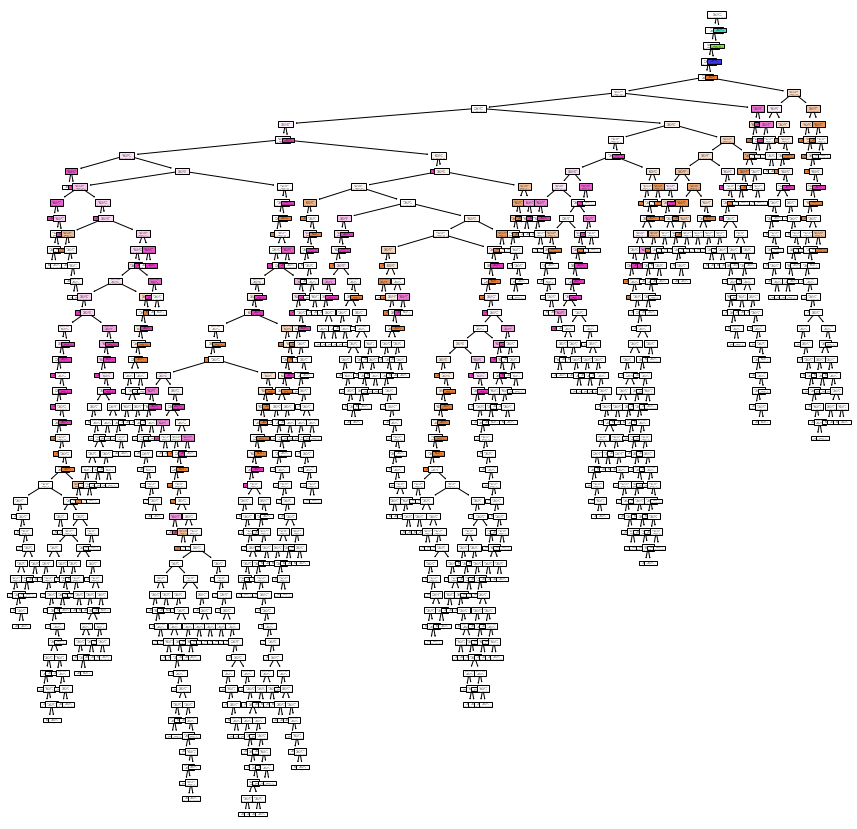

Accuracy:  0.6724367509986684
Confusion Matrix:
  [[ 65   0   0   0 223]
 [  0 312   0   0   0]
 [  0   0 291   0   0]
 [  0   0   0 315   0]
 [269   0   0   0  27]]


In [ ]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

print("Decision Tree")
plt.figure(figsize=(15,15))
tree.plot_tree(clf,filled=True)
plt.show()

print("Accuracy: ",metrics.accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n ",metrics.confusion_matrix(y_test, y_pred))

## *Random Forest*

In [ ]:
print("Random Forest")
rtc = ensemble.RandomForestClassifier(100)
rtc = rtc.fit(x_train,y_train)
y_pred = rtc.predict(x_test)
print("Accuracy: ",metrics.accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n ",metrics.confusion_matrix(y_test, y_pred))

Random Forest
Accuracy:  0.6724367509986684
Confusion Matrix:
  [[ 56   0   0   0 232]
 [  0 312   0   0   0]
 [  0   0 291   0   0]
 [  0   0   0 315   0]
 [260   0   0   0  36]]


## SVM - *Support Vector Machine*

In [ ]:

print("SVM")
svmm = svm.LinearSVC()
svmm = svmm.fit(x_train,y_train)
y_pred = svmm.predict(x_test)
print("Accuracy: ",metrics.accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n ",metrics.confusion_matrix(y_test, y_pred))



SVM
Accuracy:  0.6125166444740346
Confusion Matrix:
  [[  1   0   0   0 287]
 [  0 312   0   0   0]
 [  0   0   0 291   0]
 [  0   0   0 315   0]
 [  4   0   0   0 292]]


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [ ]:
from sklearn import neighbors


In [ ]:
print("KNN")
knnm = neighbors.KNeighborsClassifier()
knnm = knnm.fit(x_train,y_train)
y_pred = knnm.predict(x_test)
print("Accuracy: ",metrics.accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n ",metrics.confusion_matrix(y_test, y_pred))

KNN
Accuracy:  0.7250332889480693
Confusion Matrix:
  [[ 91   0   0   0 197]
 [  4 308   0   0   0]
 [  0   0 291   0   0]
 [  0   0   0 315   0]
 [212   0   0   0  84]]


Como esperado, em todos os algoritmos, houve uma confusão entre os cps "cp1252" e "latin-1", [por serem consideravelmente similares](https://www.i18nqa.com/debug/table-iso8859-1-vs-windows-1252.html).

# Agrupando Code Pages com K-Means

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(x_train)
y_pred = kmeans.predict(x_test)

print("Classificação original dos cps: ", y_test) 
print("Clusters: ", y_pred)

Classificação original dos cps:  [0. 2. 2. ... 4. 0. 2.]
Clusters:  [0 1 1 ... 0 0 1]


Como esperado, observa-se que os Code Pages 0 (cp1252) e 4 (latin-1) acabaram sendo inseridos no mesmo cluster, de id 0. Enquanto, separou-se com sucesso os outros clusters.

# Classificação de Code Pages com texto em Espanhol

Utilizou-se o texto [El Filibusterismo, do Project Gutenberg](https://www.gutenberg.org/ebooks/30903).

In [ ]:
FOLDERIN = "/content/drive/MyDrive/datasets/Project Gutenberg/"
FOLDERTEMP = FOLDERIN+"Minis/"
FILEIN = "El Filibusterismo.txt"
FILEOUTEXT = ".temp"

CODEPAGES = ["cp1252","utf-8","utf-32","utf-16"]

SIZEMINIFILE = 50 # linhas por arquivo
TOTALFILES = 1000 # número de arquivos

import os

os.makedirs(FOLDERTEMP, exist_ok=True)
print(f"The new directory {FOLDERTEMP} is created!")

The new directory /content/drive/MyDrive/datasets/Project Gutenberg/Minis/ is created!


In [ ]:
generate_mini_files()

cp1252
0 50
11 600
22 1150
33 1700
44 2250
55 2800
66 3350
77 3900
88 4450
99 5000
110 5550
121 6100
132 6650
143 7200
154 7750
165 8300
176 8850
187 9400
198 9950
209 10500
220 11050
231 11600
242 12150
253 12700


/usr/local/lib/python3.7/dist-packages/bs4/__init__.py:336: UserWarning: "http://gutenberg.org/license).
" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup


264 13250
End... Total set of files {fcounter}


In [ ]:
array = create_np_array_from_bytes_files()

y = array[:,0]
x = array[:,1:]
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=1)

Reading file /content/drive/MyDrive/datasets/Project Gutenberg/Minis/cp12520.temp
Reading file /content/drive/MyDrive/datasets/Project Gutenberg/Minis/utf-162.temp
Reading file /content/drive/MyDrive/datasets/Project Gutenberg/Minis/utf-325.temp
Reading file /content/drive/MyDrive/datasets/Project Gutenberg/Minis/utf-88.temp
Reading file /content/drive/MyDrive/datasets/Project Gutenberg/Minis/cp125211.temp
Reading file /content/drive/MyDrive/datasets/Project Gutenberg/Minis/utf-1613.temp
Reading file /content/drive/MyDrive/datasets/Project Gutenberg/Minis/utf-3216.temp
Reading file /content/drive/MyDrive/datasets/Project Gutenberg/Minis/utf-819.temp
Reading file /content/drive/MyDrive/datasets/Project Gutenberg/Minis/cp125222.temp
Reading file /content/drive/MyDrive/datasets/Project Gutenberg/Minis/utf-1624.temp
Reading file /content/drive/MyDrive/datasets/Project Gutenberg/Minis/utf-3227.temp
Reading file /content/drive/MyDrive/datasets/Project Gutenberg/Minis/utf-830.temp
Reading fil

Decision Tree


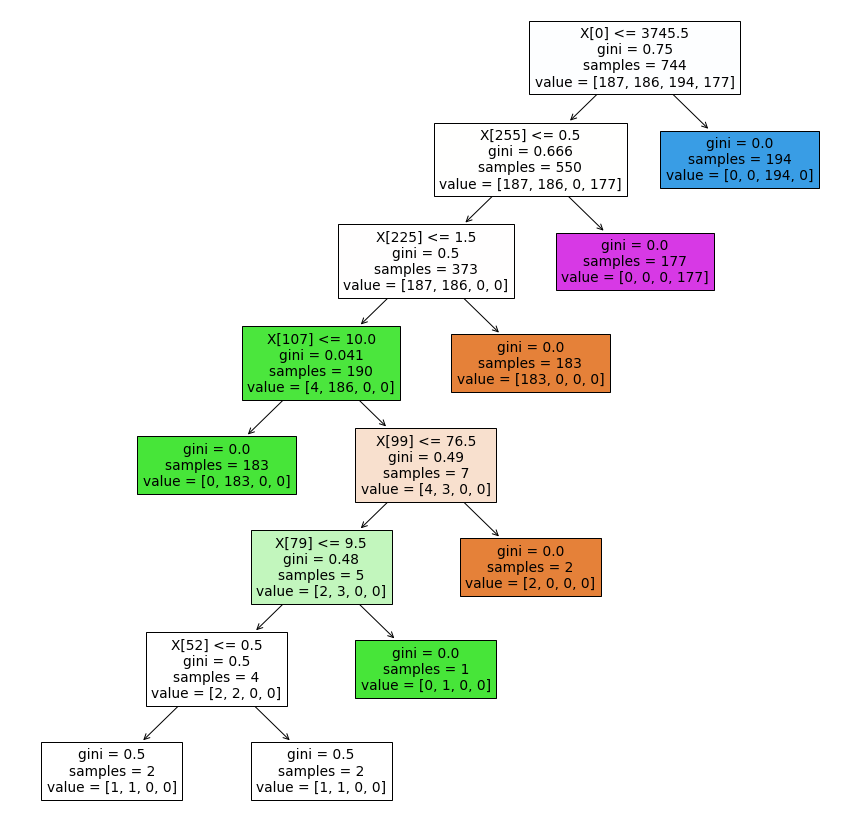

Accuracy:  0.98125
Confusion Matrix:
  [[77  2  0  0]
 [ 3 77  0  0]
 [ 0  0 71  1]
 [ 0  0  0 89]]


In [ ]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

print("Decision Tree")
plt.figure(figsize=(15,15))
tree.plot_tree(clf,filled=True)
plt.show()

print("Accuracy: ",metrics.accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n ",metrics.confusion_matrix(y_test, y_pred))

In [ ]:
from sklearn.model_selection import GridSearchCV

print("KNN")
knnm = neighbors.KNeighborsClassifier()

print("Performing Grid search on 'n_neighbors'...")
param_grid = {"n_neighbors": np.arange(1, 20)}
knn_gscv = GridSearchCV(knnm, param_grid, cv=5)
knn_gscv.fit(x_train,y_train)
print("Best params:", knn_gscv.best_params_)

y_pred = knn_gscv.predict(x_test)
print("Accuracy: ",metrics.accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n ",metrics.confusion_matrix(y_test, y_pred))

KNN
Performing Grid search on 'n_neighbors'...
Best params: {'n_neighbors': 11}
Accuracy:  0.9875
Confusion Matrix:
  [[79  0  0  0]
 [ 3 77  0  0]
 [ 0  0 71  1]
 [ 0  0  0 89]]
